In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, balanced_accuracy_score, roc_auc_score,mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFromModel
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

import shap

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv(r'greece_listings.csv')
data.shape

(20000, 25)

In [3]:
data.head(3)

,location_name,location_region,res_date,res_type,res_address,res_price,res_price_sqr,res_sqr,construction_year,levels,bedrooms,bathrooms,deleted,deleted_at,status,energyclass,auto_heating,solar,cooling,safe_door,gas,fireplace,furniture,student,parking
0,Παλαιό Φάληρο,Αττική,2021-06-18,Διαμέρισμα,"Παλαιό Φάληρο,Γήπεδα",89000,1618.0,55.0,1973.0,Υπερυψωμένο,1.0,1.0,1,2022-04-05 00:00:00,Ανακαινισμένο,Δ,1,0,1,1,0,0,0,0,NaN
1,Αχαρνές,Αττική,2022-03-30,Μεζονέτα,"Αχαρνές,Λαθέα",150000,1531.0,98.0,2010.0,4ος,2.0,1.0,1,2022-05-19 00:00:00,Νεόδμητο,Γ,0,0,0,0,0,1,0,0,Κλειστό parking
2,Παγκράτι,Αττική,2022-02-25,Διαμέρισμα,"Αθήνα,Παγκράτι",400000,3175.0,126.0,1990.0,3ος,3.0,1.0,1,2022-06-10 00:00:00,Άριστη,Δ,1,0,1,1,0,1,0,0,NaN


In [4]:
data.columns

Index(['location_name', 'location_region', 'res_date', 'res_type',
       'res_address', 'res_price', 'res_price_sqr', 'res_sqr',
       'construction_year', 'levels', 'bedrooms', 'bathrooms', 'deleted',
       'deleted_at', 'status', 'energyclass', 'auto_heating', 'solar',
       'cooling', 'safe_door', 'gas', 'fireplace', 'furniture', 'student',
       'parking'],
      dtype='object')

In [5]:
data.levels.unique()

array(['Υπερυψωμένο', '4ος', '3ος', '5ος', '1ος', 'Ημιυπόγειο', 'Ισόγειο',
       'Υπόγειο,Ισόγειο,1ος,2ος', '2ος', 'Ισόγειο,1ος,2ος,3ος', '2ος,3ος',
       'Υπόγειο', '6ος', '5ος,6ος', 'Ισόγειο,1ος', 'Ισόγειο,1ος,2ος',
       'Ημιυπόγειο,Ισόγειο,Υπερυψωμένο,1ος', 'Ημιώροφος',
       'Υπόγειο,Ισόγειο,1ος', 'Ισόγειο,Υπερυψωμένο,1ος,2ος', '8ος',
       '3ος,4ος', '4ος,5ος', '7ος', '1ος,2ος', '4ος,5ος,6ος,7ος,8ος',
       '6ος,7ος', 'Ημιυπόγειο,Ισόγειο,Ημιώροφος',
       'Ημιυπόγειο,Ισόγειο,1ος,2ος', 'Ισόγειο,Υπερυψωμένο',
       'Ημιυπόγειο,Ισόγειο,1ος', 'Υπερυψωμένο,1ος',
       'Υπόγειο,Ισόγειο,1ος,2ος,3ος,4ος,5ος,6ος,7ος', '2ος,3ος,4ος',
       'Ημιυπόγειο,1ος,2ος,3ος', 'Ισόγειο,1ος,2ος,3ος,4ος',
       'Υπόγειο,Ισόγειο,1ος,2ος,3ος', '1ος,2ος,3ος,4ος,5ος', nan,
       'Ημιυπόγειο,Υπερυψωμένο,1ος', 'Υπόγειο,Ισόγειο', 'Ισόγειο,2ος',
       'Ημιυπόγειο,Ισόγειο,Υπερυψωμένο', '3ος,4ος,5ος', 'Υπόγειο,1ος',
       '1ος,2ος,3ος', '7ος,8ος', 'Ημιυπόγειο,Υπερυψωμένο',
       'Ισόγειο,Υπερυψωμέν

In [6]:
data = data[data['location_region'] == 'Αττική']

In [7]:
data.shape

(18813, 25)

In [8]:
data.isna().sum()

location_name            0
location_region          0
res_date                 0
res_type                 0
res_address              0
res_price                0
res_price_sqr            2
res_sqr                  1
construction_year      778
levels                   8
bedrooms              1046
bathrooms             1751
deleted                  0
deleted_at            2357
status                1713
energyclass           1750
auto_heating             0
solar                    0
cooling                  0
safe_door                0
gas                      0
fireplace                0
furniture                0
student                  0
parking              15709
dtype: int64

In [9]:
data.energyclass.unique()

array(['Δ', 'Γ', 'Ζ', 'Εκρεμμεί', 'Ε', nan, 'Μη αποδοτικό', 'Β+', 'Η',
       'Α+', 'Α', 'Β', 'Εξαιρείται'], dtype=object)

In [10]:
data.sample(10)

,location_name,location_region,res_date,res_type,res_address,res_price,res_price_sqr,res_sqr,construction_year,levels,bedrooms,bathrooms,deleted,deleted_at,status,energyclass,auto_heating,solar,cooling,safe_door,gas,fireplace,furniture,student,parking
16903,Κρωπία,Αττική,2022-06-07,Μονοκατοικία,"Αθήνα,Λαγονήσι (Παραλία)",220000,1429.0,154.0,1982.0,Ισόγειο,3.0,2.0,1,2022-06-10 00:00:00,Ανακαινισμένο,Δ,0,0,1,0,0,1,0,0,NaN
1928,Αθήνα,Αττική,2022-03-27,Διαμέρισμα,"Αθήνα,Άνω Πατήσια",180000,1636.0,110.0,2009.0,1ος,2.0,1.0,1,2022-03-27 00:00:00,Καλή,Β+,1,0,0,1,1,0,0,0,NaN
13968,Αθήνα,Αττική,2022-03-22,Διαμέρισμα,"Καλλιθέα,ΟΤΕ",77000,1453.0,53.0,1970.0,4ος,1.0,1.0,1,2022-03-23 00:00:00,Χρήζει ανακαίνισης,Ζ,1,0,1,0,0,0,0,0,NaN
6816,Αθήνα,Αττική,2022-05-24,Διαμέρισμα,"Αθήνα,Αμπελόκηποι",75000,1500.0,50.0,1970.0,Υπερυψωμένο,1.0,1.0,1,2022-06-02 00:00:00,Ανακαινισμένο,Ζ,0,0,1,1,0,0,0,0,NaN
4512,Αθήνα,Αττική,2022-03-11,Διαμέρισμα,"Αθήνα,Νιρβάνα",135000,1286.0,105.0,1977.0,4ος,2.0,1.0,1,2022-04-05 00:00:00,Καλή,Γ,0,0,0,0,0,0,0,0,NaN
5846,Κρωπία,Αττική,2022-03-09,Μονοκατοικία,"Καλύβια Θορικού,Λαγονήσι (Παραλία)",1500000,2206.0,680.0,2012.0,"Ισόγειο,1ος,2ος",10.0,5.0,1,2022-03-21 00:00:00,Καλή,Δ,1,0,1,1,0,1,1,0,NaN
2475,Νίκαια,Αττική,2022-03-01,Διαμέρισμα,"Κερατσίνι,Τουρκοβούνια",90000,1200.0,75.0,1974.0,1ος,3.0,1.0,1,2022-05-17 00:00:00,Καλή,Εκρεμμεί,1,0,0,0,0,0,0,0,NaN
1784,Παγκράτι,Αττική,2022-06-08,Διαμέρισμα,"Αθήνα,Παναθηναϊκό Στάδιο",240000,3288.0,73.0,NaN,Ισόγειο,2.0,1.0,1,2022-06-10 00:00:00,Ανακαινισμένο,Εξαιρείται,0,1,1,1,0,0,0,0,NaN
1367,Παλαιό Φάληρο,Αττική,2022-05-04,Διαμέρισμα,"Παλαιό Φάληρο,Πλατεία Ντάβαρη",440000,3929.0,112.0,2021.0,5ος,3.0,NaN,1,2022-05-07 00:00:00,Υπο κατασκευή,Α+,0,0,0,0,0,0,0,0,NaN
19084,Αχαρνές,Αττική,2022-01-27,Διαμέρισμα,"Μελίσσια,Αμαλία Φλέμινγκ",213000,1991.0,107.0,1981.0,2ος,3.0,2.0,1,2022-03-24 00:00:00,Καλή,Δ,1,0,0,0,1,1,0,0,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18813 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location_name      18813 non-null  object 
 1   location_region    18813 non-null  object 
 2   res_date           18813 non-null  object 
 3   res_type           18813 non-null  object 
 4   res_address        18813 non-null  object 
 5   res_price          18813 non-null  int64  
 6   res_price_sqr      18811 non-null  float64
 7   res_sqr            18812 non-null  float64
 8   construction_year  18035 non-null  float64
 9   levels             18805 non-null  object 
 10  bedrooms           17767 non-null  float64
 11  bathrooms          17062 non-null  float64
 12  deleted            18813 non-null  int64  
 13  deleted_at         16456 non-null  object 
 14  status             17100 non-null  object 
 15  energyclass        17063 non-null  object 
 16  auto_heating       188

In [12]:
for col in data.columns:
    print(col, ':', len(data[col].unique()))

location_name : 57
location_region : 1
res_date : 1324
res_type : 5
res_address : 895
res_price : 873
res_price_sqr : 3778
res_sqr : 680
construction_year : 113
levels : 108
bedrooms : 30
bathrooms : 23
deleted : 2
deleted_at : 71
status : 9
energyclass : 13
auto_heating : 2
solar : 2
cooling : 2
safe_door : 2
gas : 2
fireplace : 2
furniture : 2
student : 2
parking : 12


In [13]:
data.drop('res_price_sqr', axis=1, inplace=True)
data.drop('location_region', axis=1, inplace=True)
data.drop('deleted_at', axis=1, inplace=True)
data.dropna(subset=['res_sqr'], inplace=True)
data.dropna(subset=['levels'], inplace=True)
data.drop('res_date', axis=1, inplace=True)

In [14]:
# we made the asumption that NaN in parking column means that there is no parking
# also we replace the status column nulls with 'Άλλη κατάσταση'
data['parking'] = data['parking'].fillna('No parking')
data['status'] = data['status'].fillna('Άλλη κατάσταση')

In [15]:
data.isna().sum()

location_name           0
res_type                0
res_address             0
res_price               0
res_sqr                 0
construction_year     771
levels                  0
bedrooms             1039
bathrooms            1744
deleted                 0
status                  0
energyclass          1746
auto_heating            0
solar                   0
cooling                 0
safe_door               0
gas                     0
fireplace               0
furniture               0
student                 0
parking                 0
dtype: int64

In [16]:
data.shape

(18805, 21)

In [17]:
# float_columns = data.select_dtypes(include=['float']).columns
# data[float_columns] = data[float_columns].astype('int')

In [18]:
for col in data.columns:
    print(col, ':', len(data[col].unique()))

location_name : 57
res_type : 5
res_address : 895
res_price : 873
res_sqr : 679
construction_year : 113
levels : 107
bedrooms : 30
bathrooms : 23
deleted : 2
status : 8
energyclass : 13
auto_heating : 2
solar : 2
cooling : 2
safe_door : 2
gas : 2
fireplace : 2
furniture : 2
student : 2
parking : 12


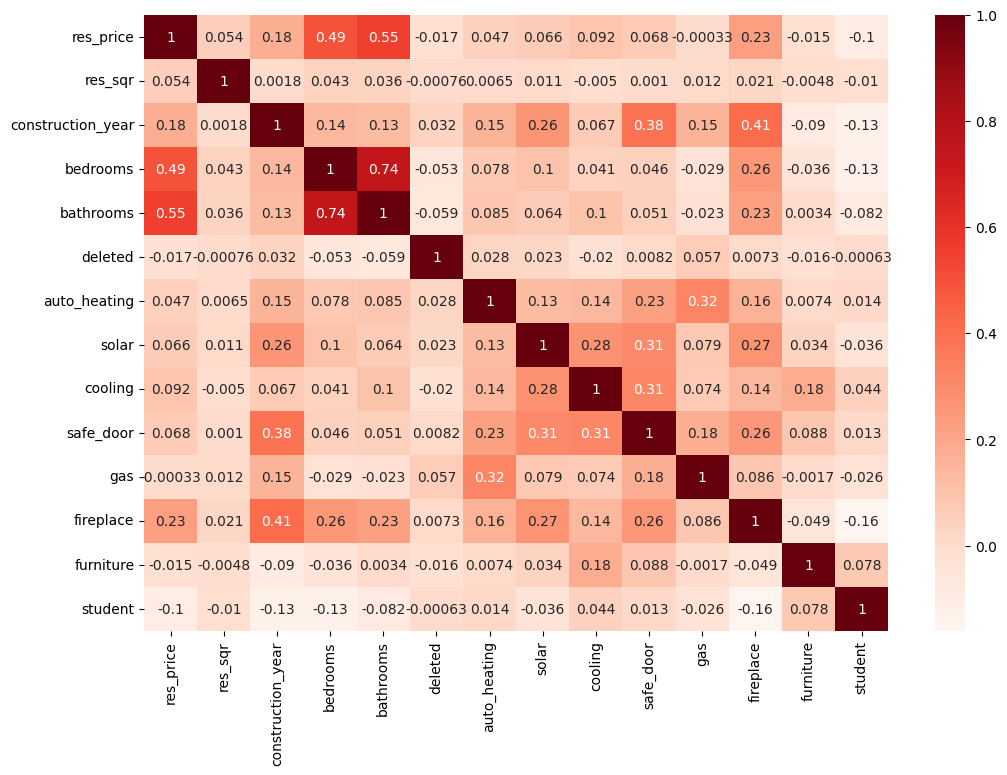

In [19]:
plt.figure(figsize=(12,8))
cor = data.iloc[:,:-1].select_dtypes(include=np.number).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
data.drop('bedrooms', axis=1, inplace=True)

<Axes: >

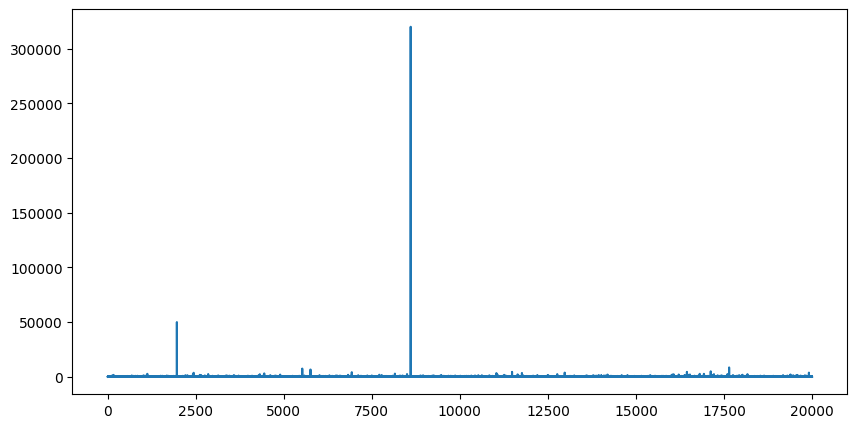

In [21]:
data['res_sqr'].plot(figsize=(10,5))

In [22]:
data = data[data['res_sqr'] < 50000]

In [23]:
data.sort_values('res_sqr', ascending=False)

,location_name,res_type,res_address,res_price,res_sqr,construction_year,levels,bathrooms,deleted,status,energyclass,auto_heating,solar,cooling,safe_door,gas,fireplace,furniture,student,parking
17643,Αθήνα,Κτίριο,"Αθήνα,Ελαιώνας",7800000,8550.0,NaN,Ισόγειο,NaN,1,Καλή,Η,0,0,0,0,0,0,0,0,No parking
5526,Βάρη - Βούλα - Βουλιαγμένη,Κτίριο,"Βούλα,Πηγαδάκια",16000000,7500.0,2015.0,"Ισόγειο,1ος,2ος,3ος",NaN,1,Ημιτελές,Ε,0,0,0,0,0,0,0,0,No parking
5760,Ελληνικό - Αργυρούπολη,Κτίριο,"Ελληνικό,Κάτω Σούρμενα",5500000,6653.0,1983.0,"Ισόγειο,1ος,2ος,3ος",NaN,1,Καλή,Ζ,1,0,0,0,0,0,0,0,No parking
17121,Μοσχάτο - Ταύρος,Κτίριο,"Αθήνα,Κάτω Πετράλωνα",5300000,5000.0,1980.0,"Υπόγειο,Ημιυπόγειο,Ισόγειο,1ος,2ος,3ος,4ος,5ος",NaN,1,Καλή,Γ,0,0,0,0,0,0,0,0,No parking
11481,Πειραιάς,Κτίριο,"Δραπετσώνα,Ταμπάκικα",3000000,4500.0,2010.0,1ος,NaN,1,Ημιτελές,Α+,1,0,0,0,1,0,0,0,Κλειστό parking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,Νέα Σμύρνη,Διαμέρισμα,"Νέα Σμύρνη,Άνω Νέα Σμύρνη",50000,13.0,1970.0,3ος,1.0,1,Καλή,Η,1,0,0,0,0,0,0,0,No parking
738,Καλλιθέα,Διαμέρισμα,"Νέα Σμύρνη,Κέντρο",50000,13.0,1970.0,3ος,1.0,1,Καλή,Η,0,1,0,0,0,0,1,0,No parking
13721,Καλλιθέα,Διαμέρισμα,"Νέα Σμύρνη,Κέντρο",50000,13.0,1970.0,3ος,1.0,1,Καλή,Η,0,1,0,0,0,0,1,0,No parking
18646,Γαλάτσι,Διαμέρισμα,"Γαλάτσι,Λαμπρινή",24000,12.0,1970.0,4ος,1.0,1,Άλλη κατάσταση,Η,0,0,0,0,0,0,0,0,No parking


In [24]:
data['res_address'] = data['res_address'].str.split(',')

In [25]:
for row in range(data.shape[0]):
    if len(data['res_address'].iloc[row]) == 1:
        data['res_address'].iloc[row] = data['res_address'].iloc[row][0]
    else:
        data['res_address'].iloc[row] = data['res_address'].iloc[row][1]

C:\Users\Andrew\AppData\Local\Temp\ipykernel_57848\590666594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['res_address'].iloc[row] = data['res_address'].iloc[row][1]
C:\Users\Andrew\AppData\Local\Temp\ipykernel_57848\590666594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['res_address'].iloc[row] = data['res_address'].iloc[row][0]


In [26]:
data.sample(10)

,location_name,res_type,res_address,res_price,res_sqr,construction_year,levels,bathrooms,deleted,status,energyclass,auto_heating,solar,cooling,safe_door,gas,fireplace,furniture,student,parking
8786,Κρωπία,Μονοκατοικία,Λαγονήσι (Παραλία),250000,250.0,1995.0,"Ισόγειο,1ος",2.0,1,Άριστη,Ζ,1,1,1,1,0,1,1,0,No parking
17168,Διόνυσος,Μεζονέτα,Κέντρο,200000,200.0,2008.0,Ισόγειο,3.0,1,Ημιτελές,Γ,1,0,0,0,0,1,0,0,Ανοιχτό parking
4350,Κρωπία,Μεζονέτα,Βάρη,450000,225.0,2006.0,Ισόγειο,3.0,1,Καλή,Εκρεμμεί,1,0,0,1,0,0,0,0,Κλειστό parking
12105,Ηλιούπολη,Διαμέρισμα,Κάτω Ηλιούπολη,340000,105.0,2021.0,2ος,1.0,1,Νεόδμητο,Α+,1,1,1,1,1,0,0,0,No parking
13497,Παλαιό Φάληρο,Μεζονέτα,Έδεμ,670000,158.0,2022.0,7ος,2.0,1,Νεόδμητο,Α+,1,1,1,1,1,1,0,0,Υπόγειο parking
14128,Κρωπία,Μονοκατοικία,Καλύβια Θορικού,170000,80.0,2000.0,Ισόγειο,1.0,1,Άλλη κατάσταση,Μη αποδοτικό,0,0,0,0,0,0,0,0,No parking
212,Γλυφάδα,Μεζονέτα,Κέντρο,610000,117.0,2021.0,"Ισόγειο,1ος",3.0,1,Υπο κατασκευή,Εκρεμμεί,1,0,0,1,0,1,0,0,No parking
9136,Γλυφάδα,Διαμέρισμα,Τερψιθέα,350000,107.0,2020.0,3ος,1.0,1,Υπο κατασκευή,Β+,0,1,0,1,0,0,0,0,No parking
13212,Ηλιούπολη,Κτίριο,Κανάρια,600000,450.0,1980.0,Ισόγειο,1.0,1,Καλή,NaN,0,0,0,0,0,0,0,0,No parking
135,Πειραιάς,Διαμέρισμα,Νέο Φάληρο,213325,80.0,2022.0,2ος,1.0,1,Υπο κατασκευή,Α+,0,1,1,1,0,0,0,0,No parking


In [27]:
data.select_dtypes(exclude=np.number).columns

Index(['location_name', 'res_type', 'res_address', 'levels', 'status',
       'energyclass', 'parking'],
      dtype='object')

In [28]:
ohe_data = pd.get_dummies(data, columns = ['location_name', 'res_type', 'res_address', 'levels', 'status',
       'energyclass', 'parking'], dtype=int)
ohe_data.shape

(18803, 811)

In [29]:
X = ohe_data.drop(columns='res_price')
y = ohe_data['res_price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14102, 810)
(4701, 810)
(14102,)
(4701,)


In [31]:
imputer_knn = KNNImputer()
X_train_knn = pd.DataFrame(imputer_knn.fit_transform(X_train))
X_test_knn = imputer_knn.transform(X_test)

In [32]:
X_test_knn = pd.DataFrame(X_test_knn)

In [33]:
X_test_knn.columns = X_train_knn.columns

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_knn)
X_test_scaled = scaler.transform(X_test_knn)

In [35]:
# Select the top k features
k = 250  # You can choose the number of features to select
selector = SelectKBest(k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

C:\Users\Andrew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 74  82  83 103 208 267 314 324 326 366 504 516 544 565 603 620 631 677
 695 712 713 716 747 751 759 770 772 773] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Andrew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\Andrew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [36]:
X_train_selected = pd.DataFrame(X_train_selected)
X_test_selected = pd.DataFrame(X_test_selected)

In [37]:
selected_features_mask = selector.get_support()

selected_features = X.columns[selected_features_mask]

In [38]:
list(selected_features)

['res_sqr',
 'construction_year',
 'bathrooms',
 'auto_heating',
 'solar',
 'cooling',
 'safe_door',
 'gas',
 'fireplace',
 'student',
 'location_name_Άγιοι Ανάργυροι',
 'location_name_Άλιμος',
 'location_name_Αθήνα',
 'location_name_Αιγάλεω',
 'location_name_Ασπρόπυργος',
 'location_name_Αχαρνές',
 'location_name_Βάρη - Βούλα - Βουλιαγμένη',
 'location_name_Βριλήσσια',
 'location_name_Γλυφάδα',
 'location_name_Διόνυσος',
 'location_name_Ελευσίνα',
 'location_name_Ηλιούπολη',
 'location_name_Καισαριανή',
 'location_name_Μαρούσι',
 'location_name_Νέα Ιωνία',
 'location_name_Παγκράτι',
 'location_name_Παπάγου',
 'location_name_Πειραιάς',
 'location_name_Περιστέρι',
 'location_name_Πετρούπολη',
 'location_name_Χαλάνδρι',
 'location_name_Χολαργός',
 'res_type_Διαμέρισμα',
 'res_type_Κτίριο',
 'res_type_Μεζονέτα',
 'res_type_Μονοκατοικία',
 'res_type_Οικία',
 'res_address_Psichiko',
 'res_address_Vari',
 'res_address_Άγιοι Άγγελοι',
 'res_address_Άγιος Βασίλειος',
 'res_address_Άγιος Διονύσ

In [39]:
X_test_selected.columns = X.columns[selected_features_mask]
X_train_selected.columns = X.columns[selected_features_mask]

In [40]:
X_train_selected

,res_sqr,construction_year,bathrooms,auto_heating,solar,cooling,safe_door,gas,fireplace,student,location_name_Άγιοι Ανάργυροι,location_name_Άλιμος,location_name_Αθήνα,location_name_Αιγάλεω,location_name_Ασπρόπυργος,location_name_Αχαρνές,location_name_Βάρη - Βούλα - Βουλιαγμένη,location_name_Βριλήσσια,location_name_Γλυφάδα,location_name_Διόνυσος,location_name_Ελευσίνα,location_name_Ηλιούπολη,location_name_Καισαριανή,location_name_Μαρούσι,location_name_Νέα Ιωνία,location_name_Παγκράτι,location_name_Παπάγου,location_name_Πειραιάς,location_name_Περιστέρι,location_name_Πετρούπολη,location_name_Χαλάνδρι,location_name_Χολαργός,res_type_Διαμέρισμα,res_type_Κτίριο,res_type_Μεζονέτα,res_type_Μονοκατοικία,res_type_Οικία,res_address_Psichiko,res_address_Vari,res_address_Άγιοι Άγγελοι,res_address_Άγιος Βασίλειος,res_address_Άγιος Διονύσιος,res_address_Άγιος Ιωάννης,res_address_Άγιος Κωνσταντίνος,res_address_Άγιος Λουκάς,res_address_Άγιος Παντελεήμονας,res_address_Άγιος Παντελεήμων,res_address_Άλσος - 401,res_address_Άνω Βούλα,res_address_Άνω Βριλήσσια,res_address_Άνω Δάφνη,res_address_Άνω Καισαριανή,res_address_Άνω Κηφισιά,res_address_Άνω Νέο Χαλάνδρι,res_address_Άνω Πάτημα,res_address_Άνω Πετράλωνα,res_address_Άνω Πετρούπολη,res_address_Άνω Πεύκη,res_address_Άνω Ψαλίδι,res_address_Όριο Βριλησσίων,res_address_Αγία Άννα,res_address_Αγία Ελεούσα,res_address_Αγία Μαρίνα,res_address_Αγία Παρασκευή,res_address_Αγιάννης,res_address_Αιξωνή,res_address_Ακαδημία Πλάτωνος,res_address_Αλεπότρυπα,res_address_Αμαξοστάσιο ΟΣΕ,res_address_Αμπελόκηποι,res_address_Ανάβρυτα,res_address_Ανάκασα,res_address_Ασύρματος,res_address_ΒΙΟΠΑ,res_address_Βάρκιζα,res_address_Βλάχικα,res_address_Βουλιαγμένη,res_address_Βούλα,res_address_Γκολφ,res_address_Γκύζη,res_address_Γλυφάδα,res_address_Δ. Ασπρόπυργου,res_address_Δ. Κερατέας,res_address_Δ. Λαυρεωτικής,res_address_Δραπετσώνα,res_address_Δροσιά,res_address_Δροσούπολη,res_address_Εκάλη,res_address_Εκτελωνιστών - Εφοριακών,res_address_Ελαιώνας,res_address_Ελευσίνα,res_address_Ερυθρός,res_address_Ζάππειο,res_address_Ηπείρου,res_address_Θρακομακεδόνες,res_address_Ιεράπολη,res_address_Ιλίσια,res_address_Ινέπολη,res_address_Ιπποκράτειος Πολιτεία,res_address_Κάτω Αιγάλεω,res_address_Κάτω Βούλα,res_address_Κάτω Ελληνικό,res_address_Κάτω Ηλιούπολη,res_address_Κάτω Πατήσια,res_address_Κέντρο,res_address_Καβούρι,res_address_Καλλιρρόης,res_address_Καμίνια,res_address_Καρέας,res_address_Καστρί,res_address_Κεφαλάρι,res_address_Κεφαλλήνων,res_address_Κολιάτσου,res_address_Κολοκυνθού,res_address_Κολωνός,res_address_Κοντόπευκο,res_address_Κουμουνδούρου,res_address_Κουντουριώτικα,res_address_Κυθηρίων - Πανί,res_address_Λεγρενά,res_address_Λιούμη,res_address_Λυκαβηττός,res_address_Λόγγος,res_address_Λόφος Σικελίας,res_address_Μάδυτος,res_address_Μετς,res_address_Μικρολίμανο,res_address_Μοναστηράκι,res_address_Μοσχάτο,res_address_Μπουρνάζι,res_address_Νέα Αλεξάνδρεια,res_address_Νέα Ελβετία,res_address_Νέα Ερυθραία,res_address_Νέα Κάλυμνος,res_address_Νέο Παγκράτι,res_address_Νέο Φάληρο,res_address_Νέος Οικισμός,res_address_Ναυπηγεία,res_address_Νεάπολη,res_address_Νοσοκομείο Παίδων,res_address_Ντράφι,res_address_ΟΤΕ,res_address_Ολυμπιακές Εγκαταστάσεις - Αεροδρόμιο,res_address_Ολυμπιακό Χωριό,res_address_Πάτημα,res_address_Παγκράτι,res_address_Παλαιό Ηράκλειο,res_address_Παλιές Κουκουβάουνες,res_address_Παναθηναϊκό Στάδιο,res_address_Πανιωνία,res_address_Πανόραμα,res_address_Πανόρμου,res_address_Παπάγου,res_address_Παράδεισος,res_address_Πασαλιμάνι (Μαρίνα Ζέας),res_address_Πεντέλη,res_address_Περιβόλια,res_address_Πηγαδάκια,res_address_Πλατεία Αμερικής,res_address_Πλατεία Αττικής,res_address_Πλατεία Βάθης,res_address_Πλατεία Βικτωρίας,res_address_Πλατεία Δημοκρατίας,res_address_Πλατεία Ιπποδαμείας,res_address_Πλατεία Παπαδιαμάντη,res_address_Πολύδροσο,res_address_Πράσινος Λόφος,res_address_Προφήτης Ηλίας,res_address_Ριζάρειος,res_address_Ριζούπολη,res_address_Σαφράμπολη,res_address_Σεπόλια,res_address_Σκοπευτήριο,res_address_Σταθμός 

In [41]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train_selected, y_train)

y_pred = rf.predict(X_test_selected)

In [42]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.4940
MSE: 210148262844.4351
RMSE: 458419.3090
MAE: 117835.6899


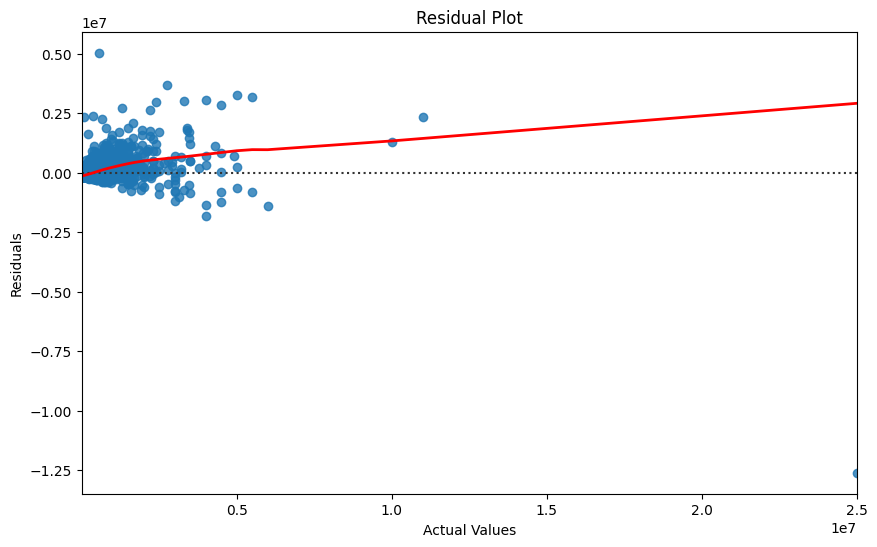

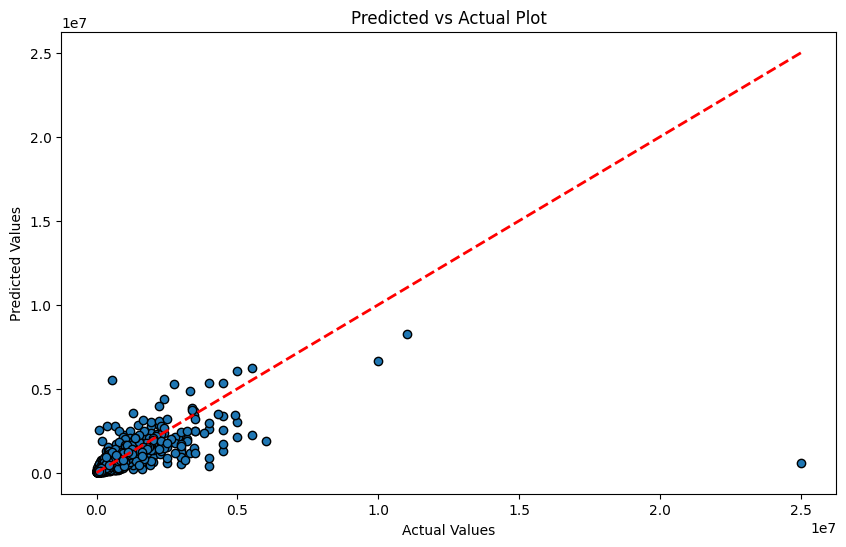

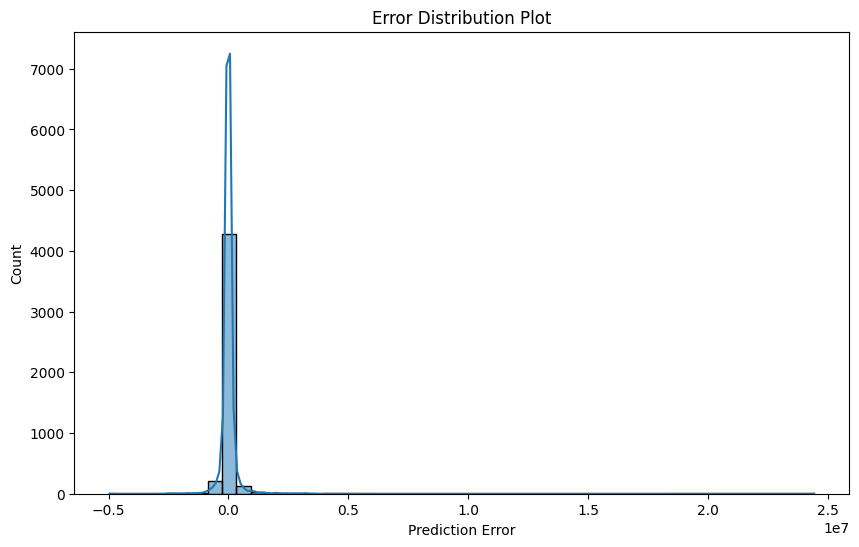

In [43]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Plot')
plt.show()

# Error Distribution Plot
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True)
plt.xlabel('Prediction Error')
plt.title('Error Distribution Plot')
plt.show()